Demo: KITTENS
====================




Intro
-----

In this demo, we're going to pull kitten pictures from the Internet and perform image recognition on them.
In the process, we'll learn the basics of how you can use programming to communicate with the Internet.


Our strategy
------------

The main jargon keyword of this lesson is "API" or "web API" (it doesn't matter what it stands for, treat it like a word). What's an API?  Just as your web browser, Firefox or Chrome or Explorer or Safari, is your window to the Internet, a web API is code's window to the Internet.  Sites that want to communicate with you will build nice websites for you to visit.  Sites that want to communicate with your code will build nice APIs that make it easy for your programs to access lots of kinds of data in clean formats.  

We're going to start simple.  There are a lot of sites out there that want to talk to your computer, some more serious than others.  We'll start very serious, at [placekitten.com](https://placekitten.com), a site whose API makes it easy to get pictures of kittens.  It accepts a few variables and serves a picture made to order.  Those variables are:
* How tall a picture do you want (in pixels)?
* How wide do you want it? 
* Do you want it in color or greyscale?

After zipping around the Internet pulling down kitten pictures, we're going to play around with the pictures we collected.  You've heard about machine learning and computer vision, and maybe even seen them in action through phone apps or being a person in this age.  We'll end the lesson by using these techniques on kitten pictures.  I've prepared you a "kitten detector" that can look at a picture and tell you 1) if it has a kitten and 2) where in the picture that kitten is.


## Kitten pictures make the Internet complete

Although we experience code as a very textual thing, it is at root a language of 1's and 0's suited to working with other things that can be represented in 1's and 0's.  These things include text, pictures, music, movies, memes, and all kinds of things.  They can all be accessed, visualized, and manipulated once you understand code.

## `placekitten.com` in the browser
Memes, as visual as they are, can be accessed and advanced in code. To see this in action, visit [http://placekitten.com/](http://placekitten.com/), a small simple service that reinforces the Internet's obsession with kittens, by making it easy to programmatically access kitten pictures of any size.

After browsing a bit, you'll see that there really isn't much to the site.  

Instead of going to  
http://placekitten.com/  
go to 
http://placekitten.com/800/600  
You'll get a kitten picture 800 pixels wide and 600 tall.

Going to
http://placekitten.com/600/800  
Will give you a picture 600 wide and 800 tall.

Now go to  
http://placekitten.com/801/600  
You'll get a different picture, slightly wider, but still containing a kitten. 

That's it, that's most of the kitten API.  I implied that APIs speak a different language than web browsers.  They generally do, but this API is so simple that you can access it through your browser exactly the way you'll be accessing it through Python.  

So now let's do everything in code that we just did in the browser.


## Boilerplate code
Lots of boilerplate.  Computer vision isn't simple. But the code is skimmable, and works.  And you just have to run it.

In [ ]:
#%pip install --user matplotlib
#%pip install --user numpy
#%pip install --user opencv-python
#%pip install --user pillow 
#%pip install --user git+https://github.com/SocialScienceWithOnlineData/image_play.git

In [1]:
from image_play import *


## `placekitten.com` in code


I'm going to provide you with a few functions that you can assemble to retrieve and view images.  We'll find that, in addition to putting simple things like numbers into variables, we can also put complex things like images into variables.  

I've given you a function, `placekittendotcomURL()`, which takes width and height and returns a URL that you can either plug into your browser, or use within Python.

In [2]:
print( placekittendotcomURL( 800, 600 ) )   # color

http://placekitten.com/800/600


I'm also providing you with a function called `url_to_image()`, which takes a URL, like that returned by `placekittendotcomURL()`, and returns an image that you can assign to a variable.  This is where the Internet magic happens: this function surfs the Internet automatically and brings back parts of it for us to play with.

Last, I've provided `print_image()`, which you'll use instead of `print()` to take an image variable and print it out to the screen.

Let's try it all together to view our first image in code.

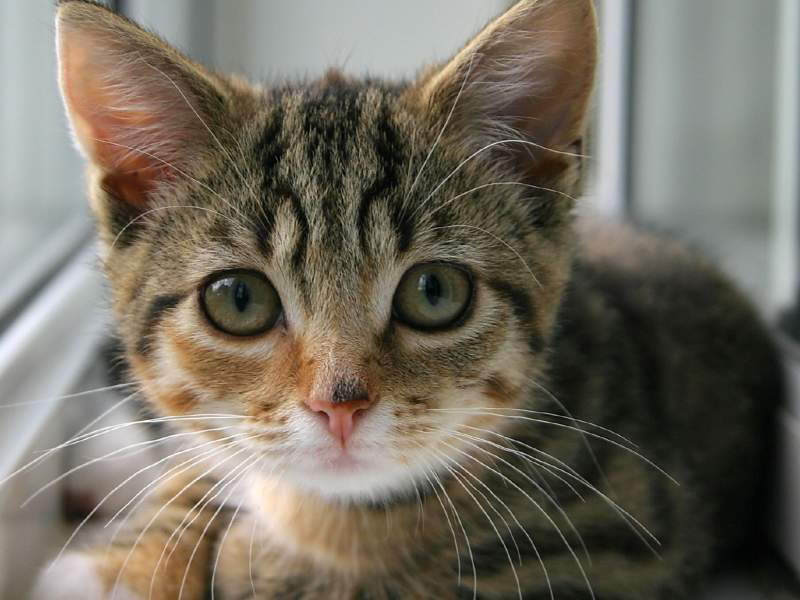

In [3]:
# big kitten picture
kittenURL = placekittendotcomURL(800, 600)
kittenPic = url_to_image( kittenURL ) # 🚀  Lines with a rocketship are the ones that interact with the Internet
print_image( kittenPic )

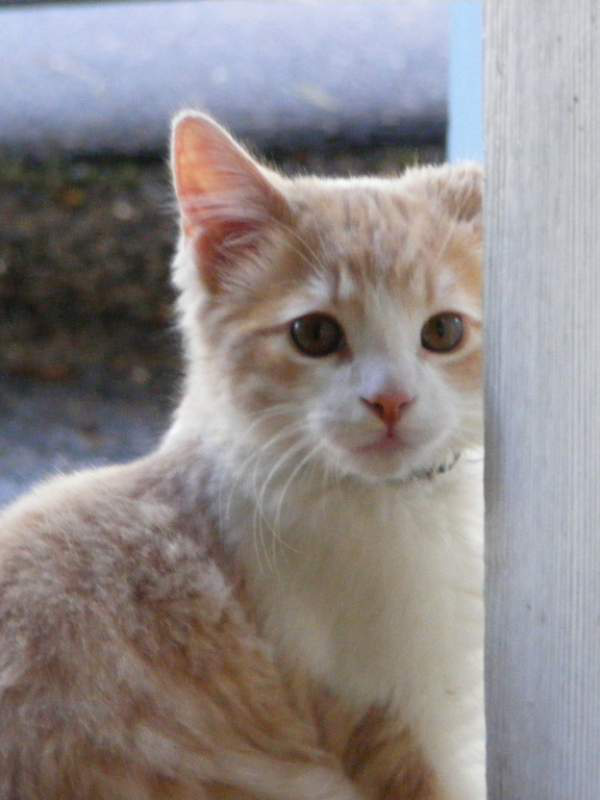

In [4]:
kittenURL = placekittendotcomURL(600, 800)
kittenPic = url_to_image( kittenURL ) # 🚀
print_image( kittenPic )

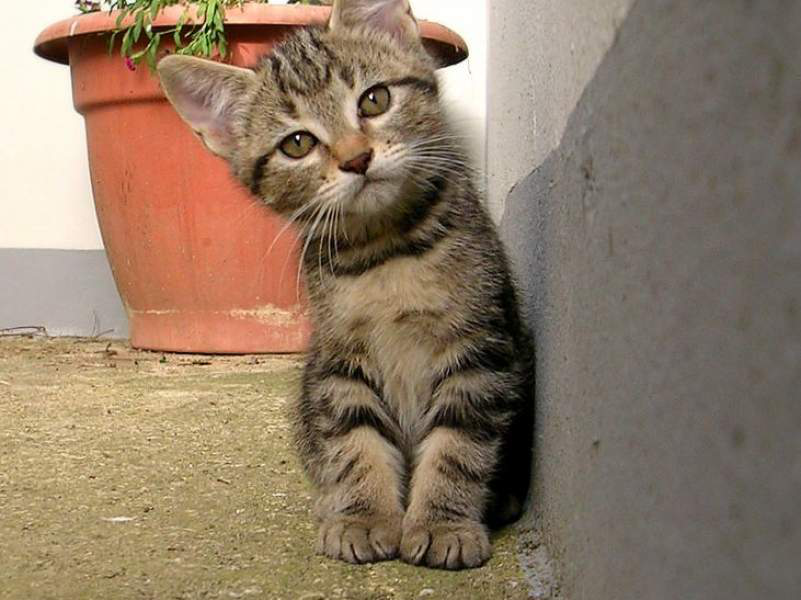

In [5]:
kittenURL = placekittendotcomURL(801, 600)
kittenPic = url_to_image( kittenURL ) # 🚀
print_image( kittenPic )

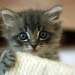

In [6]:
# tiny kitten picture
kittenURL = placekittendotcomURL(75, 75)
kittenPic = url_to_image( kittenURL ) # 🚀
print_image( kittenPic )

In [7]:
kittenURL = placekittendotcomURL(20, 20)
kittenPic = url_to_image( kittenURL ) # 🚀
print_image( kittenPic )

##  Kittens *as* data: Modern object detection

Does your computer know that there are kittens in these images?  Due to recent advances in the area of computer vision, the answer can be yes.

Computer vision is the subset of machine learning or artificial intelligence concerned with giving machines a human-like or human-competitive understanding of the visual world.  It has made tremendous advances since about 2014 when Facebook revealed a major leap in naturalistic facial recognition.

Facebook's advance depended both on new algorithms and access to huge datasets.  A machine learns best by being shown lots of well-labeled examples.  Once it has learned, the representation of its knowledge (its "mind") may be quite small and portable, even if the mass of material it learned over was astronomically large. In our case, it's a file.   

We will use an open-source computer vision project to try out an excellent kitten detector that already works. We can use it to locate kittens in photos automatically.  In the code below, `catFaceDetector` connects our code to the prebuilt kitten-seer. You can use the function `locateObject()` to find things in photos, just give it an image and a classifier to use.

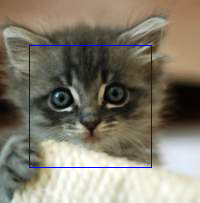

In [8]:
# You can try different cat photos by changing the number inputs to getKittenURL by tiny amounts.  
#   Those numbers are the width and height.
catImage = url_to_image(placekittendotcomURL(200,203))  # 🚀
catImageDetection = locateObject(catImage, catFaceDetector)
print_image( catImageDetection )

If you try running this several times with different values of height and width, you'll see that it usually succeeds in finding a kitten in our kitten pictures, but sometimes fails.

## Kitten meme detector
Plug in the URL for any meme (with URL ending in `.gif`, `.jpg`, `.png`, or lots of other formats) to automatically detect if it's a cat meme.

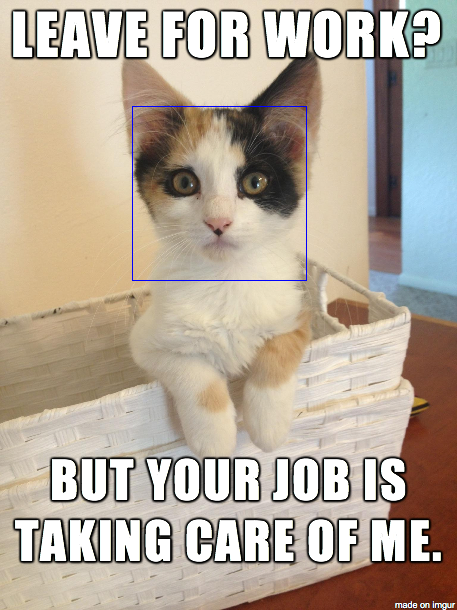

In [9]:
catImage = url_to_image("https://i.imgur.com/hHqerTu.png")  # 🚀
catImageDetection = locateObject(catImage, catFaceDetector)
print_image( catImageDetection )

## Summary

We ran code that browses the Internet for us, specifically the Internet's cat photos.  We used a kitten picture API to pull photos of different dimensions down into our code.  Then we ran some code that applies exciting advances in artificial intelligence to automatically locate the kittens' faces in each image.

---------------